In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
# path
dataset_path = os.path.join("..", "data", "raw", "Retinal Fundus Images", "train")



# list all classes in train folder
classes = os.listdir(dataset_path)
print("Classes:", classes)

# number of images in each class
class_counts = {}
for class_name in classes:
    classpath = os.path.join(dataset_path, class_name)
    class_counts[class_name] = len(os.listdir(classpath))

# sorted classes by class name
sorted_class_counts = dict(sorted(class_counts.items(), key=lambda x: int(x[0].split(".")[0])))

# print sorted distribution
print("Class Distribution")
for class_name, count in sorted_class_counts.items():
    print(f"{class_name}: {count} images")

Classes: ['8.Hypertensive Retinopathy', '1.Dry AMD', '10.Glaucoma', '5.Severe DR', '9.Pathological Myopia', '2.Wet AMD', '7.Cataract', '3.Mild DR', '6.Proliferate DR', '4.Moderate DR', '11.Normal Fundus']
Class Distribution
1.Dry AMD: 1276 images
2.Wet AMD: 545 images
3.Mild DR: 2294 images
4.Moderate DR: 4982 images
5.Severe DR: 1635 images
6.Proliferate DR: 1295 images
7.Cataract: 1369 images
8.Hypertensive Retinopathy: 1220 images
9.Pathological Myopia: 1142 images
10.Glaucoma: 1678 images
11.Normal Fundus: 2641 images


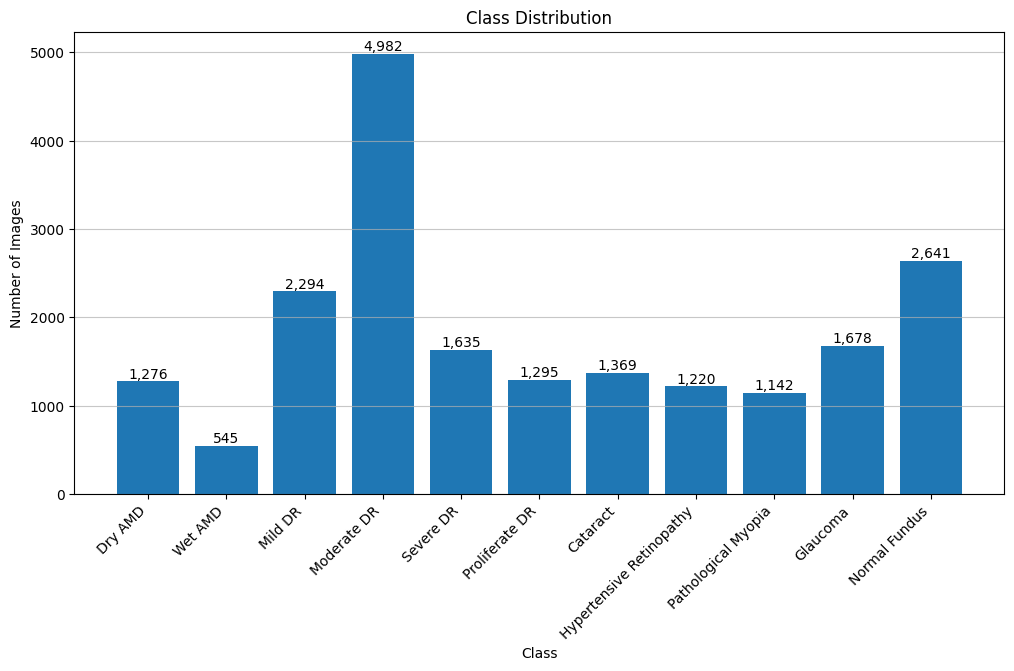

In [11]:
# remove number
cleaned_class_names = [name.split(".", 1)[-1] for name in sorted_class_counts.keys()]

# plot class distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(cleaned_class_names, sorted_class_counts.values())
# Add data labels
plt.bar_label(bars, labels=[f"{int(height):,}" for height in sorted_class_counts.values()])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.show()


In [13]:
# check aspects ratios of images
image_sizes = [
    {
        "Class": class_name,
        "Image": image_file,
        "Width": Image.open(os.path.join(dataset_path, class_name, image_file)).size[0],
        "Height": Image.open(os.path.join(dataset_path, class_name, image_file)).size[1],
        "Aspect Ratio": Image.open(os.path.join(dataset_path, class_name, image_file)).size[0] / Image.open(os.path.join(dataset_path, class_name, image_file)).size[1]
    }
    for class_name in classes
    for image_file in os.listdir(os.path.join(dataset_path, class_name))]

# convert to df
image_sizes_df = pd.DataFrame(image_sizes)
# print(image_sizes_df)

# count by size
sizes = image_sizes_df.groupby(['Width', 'Height', 'Aspect Ratio']).size().reset_index(name='Count')
sizes = sizes.sort_values(by='Count', ascending=False)

print(sizes)


     Width  Height  Aspect Ratio  Count
1      512     512      1.000000   9871
228   1024    1024      1.000000   3700
125   1024     840      1.219048    293
227   1024    1023      1.000978    256
177   1024     928      1.103448    239
..     ...     ...           ...    ...
202   1024     956      1.071130      1
203   1024     960      1.066667      1
207   1024     966      1.060041      1
208   1024     968      1.057851      1
235   1024    1041      0.983670      1

[236 rows x 4 columns]


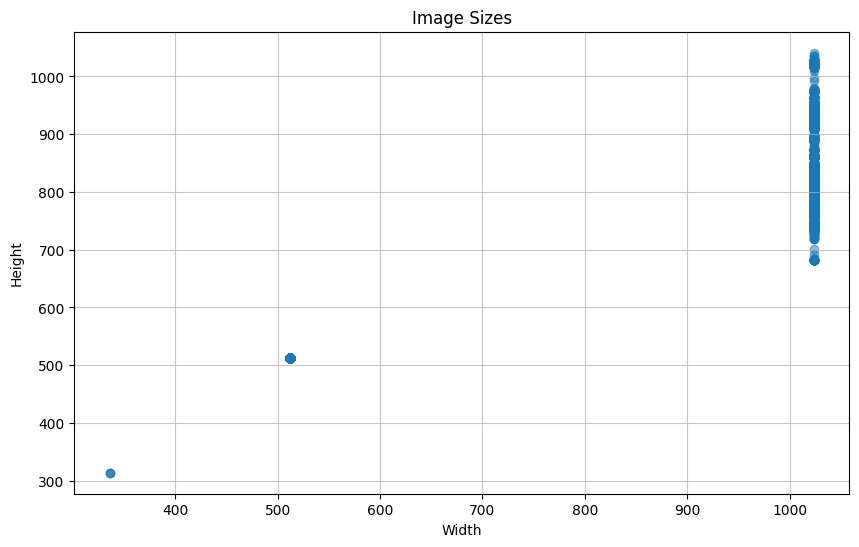

In [15]:
# Plot sizes
plt.figure(figsize=(10, 6))
plt.scatter(image_sizes_df["Width"], image_sizes_df["Height"], alpha=0.5)
plt.title("Image Sizes")
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid(alpha=0.7)
plt.show()

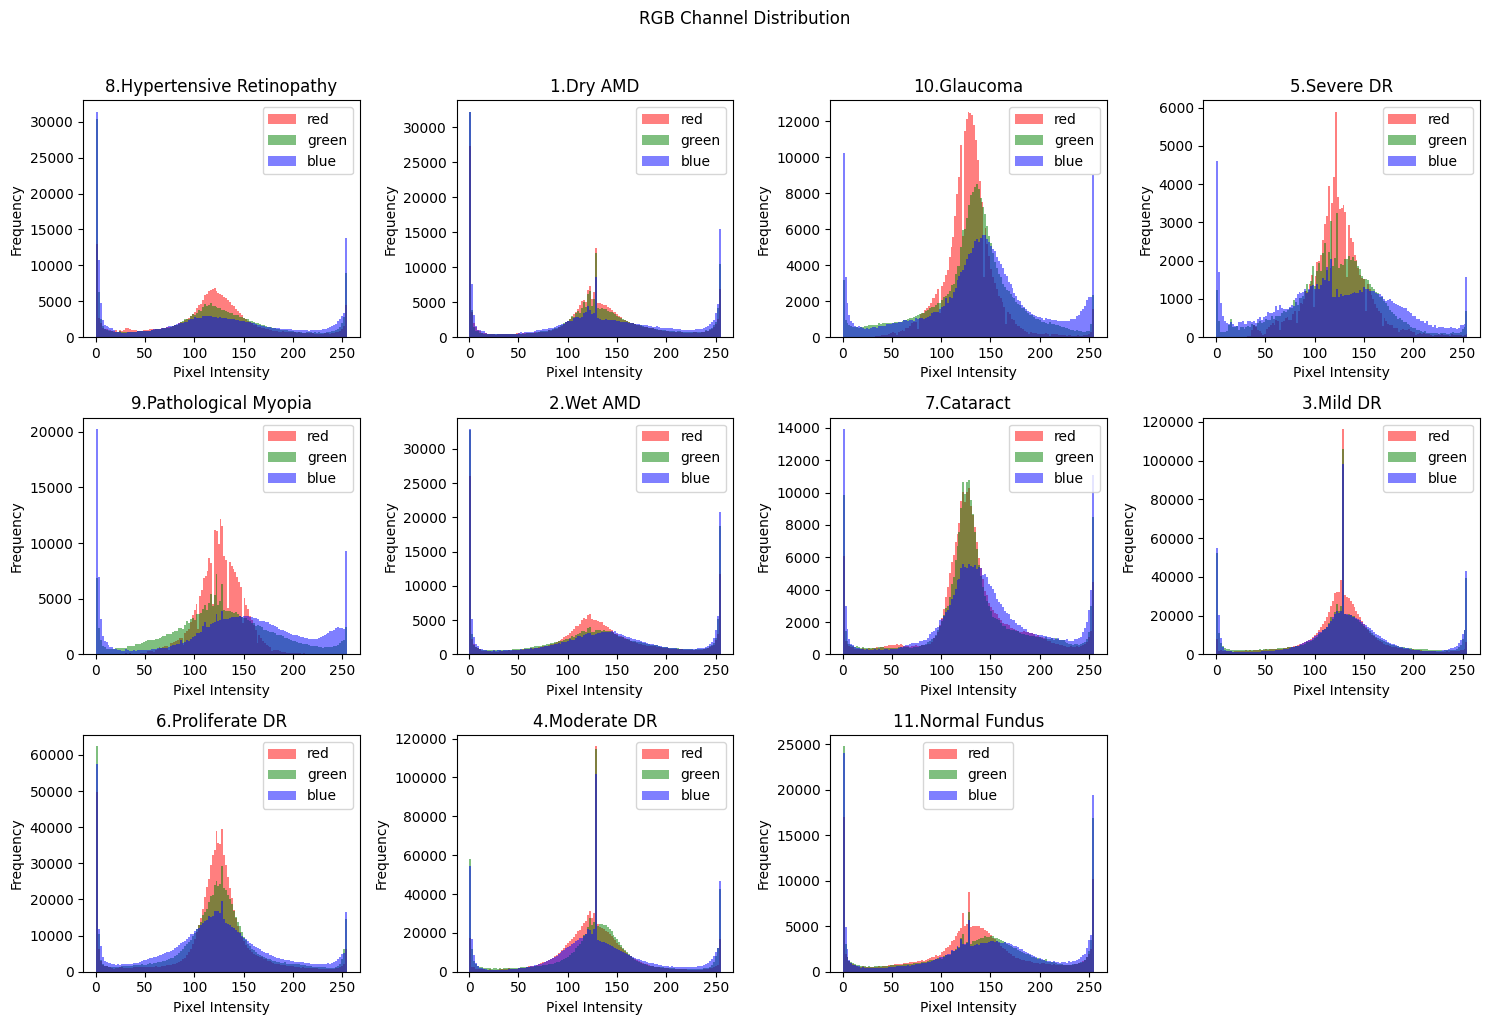

In [17]:
# set up
plt.figure(figsize=(15, 10))
plt.suptitle("RGB Channel Distribution", y=1.02)

# iterate for one image
colors = ['red', 'green', 'blue']

for image, class_name in enumerate(classes):
    files = os.listdir(os.path.join(dataset_path, class_name))
    img_path = os.path.join(dataset_path, class_name, files[0])  # First image
    
    img = np.array(Image.open(img_path))
    
    plt.subplot(3, 4, image+1) # subplot
    for channel, color in enumerate(colors):
        plt.hist(img[:, :, channel].ravel(), bins=256, color=color, alpha=0.5, label=color)
    plt.title(class_name)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


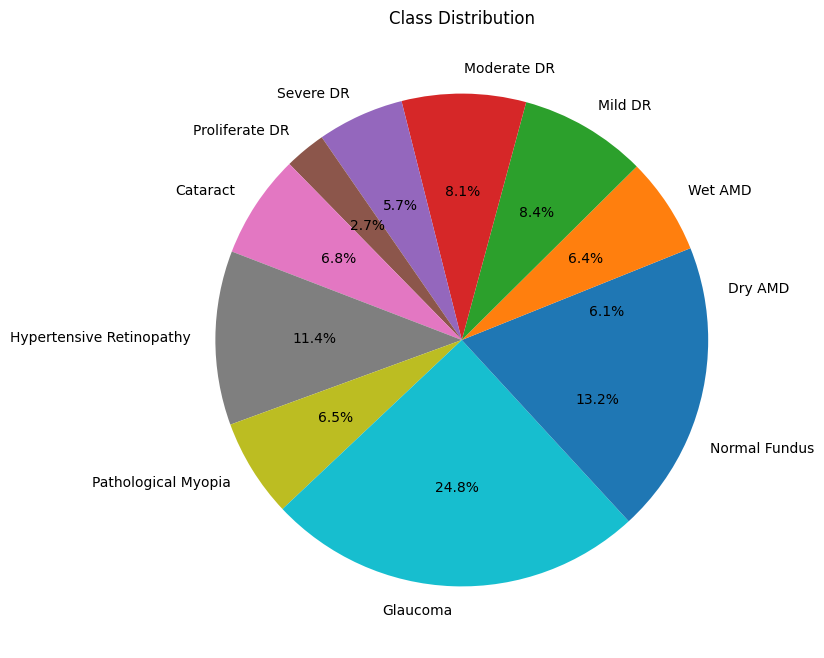

In [18]:
# pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=cleaned_class_names, autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()